# Figure 15.
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/23/2025          |
| Updated |  08/23/2025          |

Total core hours (i.e., the multiplicative product of the number of CPU cores and the elapsed real time) used to integrate various Athena++ models up to the same simulation time limit $t_\mathrm{lim} \approx 6.5\times10^{5}\,\mathrm{s} \approx 2.6t_\mathrm{eq}$ (Figure 7 and Section 4.4.3).
Left and right panels are functions of the number of frequency bands $N_f$ and number of cell-centered polar angles $N_\zeta$ between 0 and $\pi/2$, respectively (Section 2.1).
Marker colors show models with different $N_\zeta$ on the left and $N_f$ on the right, crosses show the same model in either panel, dashed blue guidelines show linear scaling, and the orange horizontal line shows a similar model a without radiation.

N_f	N_ζ	Core Hours
(3)	(4)	(11)
0	0	0.03
1	1	0.26
3	4	8.7
4	4	9.5
8	4	22.8
16	4	25.2
32	4	41.5
64	1	39.5
64	2	52.3
64	4	85.2
64	8	159.7


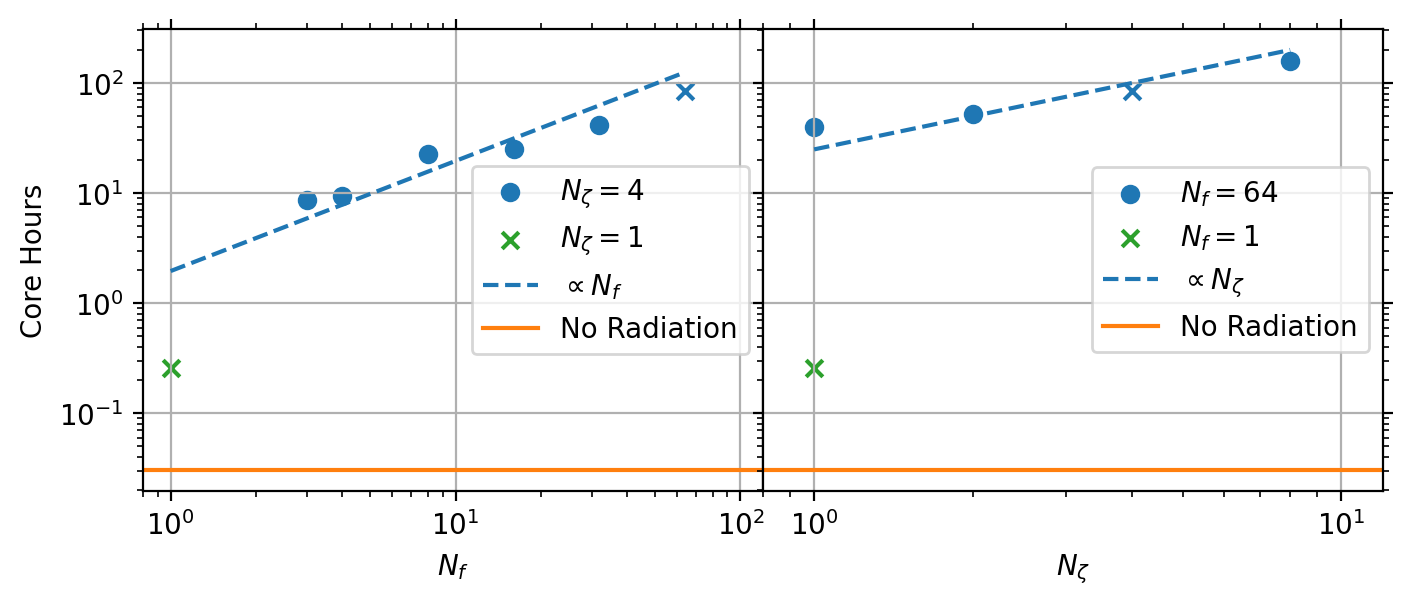

In [1]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np

# Guidelines
n2 = np.asarray([1, 64])
n3 = np.asarray([1, 8])
def pow_law(n, a, k):
    return a*n**k

# Manually acquired data (e.g., from Athena++ standard outputs)
cores = 128
shared_nfreq = 64
shared_nzeta = 4
shared_time = 2.3954686099999999e+03
nfreq = np.asarray([3, 4, 8, 16, 32])
nzeta = np.asarray([1, 2, 8])
nfreq_times = np.asarray([2.4462723399999999e+02,
                          2.6619104099999998e+02,
                          6.4109173899999996e+02,
                          7.0872024499999998e+02,
                          1.1663840140000000e+03])
nzeta_times = np.asarray([1.1115009540000001e+03,
                          1.4704507220000000e+03,
                          4.4908124760000001e+03])
root_nfreq = 1
root_nzeta = 1
root_time = 7.1832839999999996e+00
no_rad_time = 8.5958800000000002e-01

# Print core hours
print('N_f\tN_ζ\tCore Hours')
print('(3)\t(4)\t(11)')
print(f'{0}\t{0}\t{cores*no_rad_time/3600:.2f}')
print(f'{root_nfreq}\t{root_nzeta}\t{cores*root_time/3600:.2f}')
for i, f in enumerate(nfreq):
    print(f'{f}\t{shared_nzeta}\t{cores*nfreq_times[i]/3600:.1f}')
for i, zeta in enumerate(nzeta[:-1]):
    print(f'{shared_nfreq}\t{zeta}\t{cores*nzeta_times[i]/3600:.1f}')
print(f'{shared_nfreq}\t{shared_nzeta}\t{cores*shared_time/3600:.1f}')
print(f'{shared_nfreq}\t{nzeta[-1]}\t{cores*nzeta_times[-1]/3600:.1f}')

# Plot
fig, axs = plt.subplots(ncols=2, sharey='row', figsize=(8, 3), dpi=200)
axs[0].scatter(shared_nfreq, cores*shared_time/3600, color='tab:blue',
               marker='x')
axs[0].scatter(nfreq, cores*nfreq_times/3600, label=r'$N_\zeta = 4$')
axs[0].scatter(root_nfreq, cores*root_time/3600, color='tab:green', marker='x',
               label=r'$N_\zeta = 1$')
axs[0].plot(n2, pow_law(n2, cores*55/3600, 1), color='tab:blue', ls='--',
            label=r'$\propto N_f$')
axs[0].axhline(cores*no_rad_time/3600, color='tab:orange',
               label='No Radiation')
axs[1].scatter(shared_nzeta, cores*shared_time/3600, color='tab:blue',
               marker='x')
axs[1].scatter(nzeta, cores*nzeta_times/3600, label='$N_f = 64$')
axs[1].scatter(root_nzeta, cores*root_time/3600, color='tab:green', marker='x',
               label='$N_f = 1$')
axs[1].plot(n3, pow_law(n3, cores*700/3600, 1), color='tab:blue', ls='--',
            label=r'$\propto N_\zeta$')
axs[1].axhline(cores*no_rad_time/3600, color='tab:orange',
               label='No Radiation')

# Format plots
for ax in axs:
    ax.grid()
    ax.legend()
    ax.minorticks_on()
    ax.set(xscale='log', yscale='log')
    ax.tick_params(axis='both', which='both', top=True, right=True)
axs[0].set(xlabel='$N_f$', xlim=(0.8, 120), ylabel='Core Hours')
axs[1].set(xlabel=r'$N_\zeta$', xlim=(0.8, 12), xticks=[1e0, 1e1])
fig.subplots_adjust(wspace=0)
plt.savefig('figs/performance.pdf', bbox_inches='tight', pad_inches=0.01)
#===============================================================================
